In [124]:
import matplotlib.pyplot as plt
import numpy as np
N=1000
D=2
r1=5.0
r2=10.0

In [125]:
R1=np.random.randn(500)+r1
# polar coordinates
theta=2*np.pi*np.random.randn(500)
X1=np.concatenate([[R1*np.cos(theta)],[R1*np.sin(theta)]]).T

In [126]:
R2=np.random.randn(500)+r2
# polar coordinates
theta=2*np.pi*np.random.randn(500)
X2=np.concatenate([[R2*np.cos(theta)],[R2*np.sin(theta)]]).T


In [127]:
X=np.concatenate((X1,X2))
y=np.array([0]*500+[1]*500)

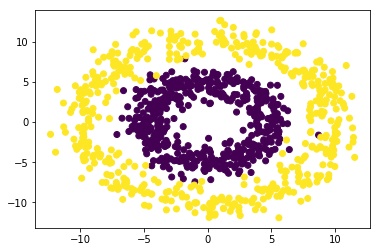

In [128]:
plt.scatter(X[:,0],X[:,1],c=y)

In [129]:
# create column for bias term
x0=np.array([np.ones(N)]).T

## To solve this problem, we'll create another column i.e. radius column which represents radius of a point

In [130]:
r=np.zeros((N,1))

In [131]:
for i in range(N):
    r[i]=np.sqrt(X[i,:].dot(X[i,:]))

In [132]:
X=np.concatenate((x0,r,X),axis=1)

In [133]:
X

array([[  1.        ,   5.36824845,  -2.43726004,  -4.78308007],
       [  1.        ,   6.29797362,   4.83516055,  -4.03555375],
       [  1.        ,   4.08479773,  -3.26032732,  -2.46086128],
       ...,
       [  1.        ,   9.06119066,   6.09691372,   6.70319471],
       [  1.        ,   9.33970889,  -9.33940627,   0.07518479],
       [  1.        ,  11.31463567,   0.19842073, -11.31289572]])

In [134]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))
def feed_forward(X,w):
    return sigmoid(X.dot(w))
def cross_entropy(y,y_p):
    E=0
    for i in range(len(y)):
        if y[i]==1:
            E-=np.log(y_p[i])
        else:
            E-=np.log(1-y_p[i])
    return E
#     return -(y*np.log(y_p)+(1-y)*np.log(1-y_p)).mean()

In [135]:
w=np.random.randn(4)
cost=[]
lr=0.01
for i in range(5000):
    y_pred=feed_forward(X,w)
    w=w-lr*(X.T.dot((y_pred-y)))
    cost.append(cross_entropy(y,y_pred))


C:\Users\ytnvj\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


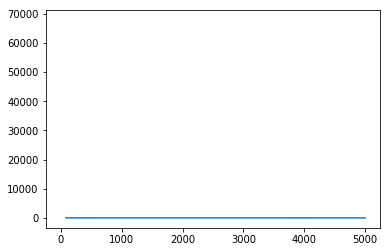

In [136]:
plt.plot(cost)

In [137]:
w

array([-9.59453065e+01,  1.28342407e+01,  5.51540914e-02, -1.98234089e-01])

In [138]:
print('Classification Rate: ',(1-np.abs(y-np.round(y_pred)).sum()/N))

Classification Rate:  0.99
